# Contextualização

Case: Expansão de uma rede de laboratórios.

Cenário: A medicina diagnóstica tem um papel fundamental na jornada de atendimento dos pacientes de qualquer sistema de saúde em qualquer lugar do mundo, sendo somente nos EUA um mercado de aproximadamente 106 bilhões de dólarers com mais de 40 mil laboratórios, empregando mais de 680 mil funcionários segundo a ACLA.

Problema: Diante desse cenário, o desafio proposto tem como objetivo auxiliar a área de negócios de uma rede norte americana de medicina diagnóstica a ter insumos iniciais para suportar seu plano de expansão da rede de laboratórios. Sabe-se que não é possível ou é bem difícil gerar demanda e fazer ofertas neste tipo de mercado, entretanto é muito interessante e rentável fidelizar o cliente para que ele sempre visite a rede quando surgir a necessidade.

Proposta: Apresente e justifique a escolha de três zip codes para a instalação dos novos laboratórios da rede.

# Entendimento e Preparação

## Importação dos dados e bibliotecas

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io

In [2]:
lab_loc = pd.read_csv('df_geocode.csv', index_col=0)

In [3]:
exames = pd.read_csv('test_data.csv')

In [4]:
df_econ = pd.read_csv('EconomicData_ZCTAs.csv', index_col=0)

In [5]:
df_demo = pd.read_csv('DemographicData_ZCTAs.csv', index_col=0)

In [6]:
df_exames = pd.read_csv('transactional_data.csv',sep=';')

## Limpeza dos Dados


### Exames

Características de todos os exames realizados pela rede contendo código, descrição, custo, categoria, especialidade e família de cada exame.

In [7]:
exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CodItem       2002 non-null   int64  
 1   Desc Item     2002 non-null   object 
 2   Category      2002 non-null   object 
 3   Family        2002 non-null   object 
 4   Speciality    2002 non-null   object 
 5   Testing Cost  2002 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.0+ KB


In [8]:
exames.describe()

,CodItem,Testing Cost
count,2.002000e+03,2002.000000
mean,7.000366e+07,77.767453
std,2.266169e+03,146.066382
min,7.000004e+07,0.000000
25%,7.000166e+07,4.812500
50%,7.000359e+07,21.190000
75%,7.000534e+07,79.270000
max,7.000900e+07,1762.460000


In [9]:
exames.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


In [10]:
exames.isnull().any(axis=1).sum()

0

In [11]:
exames.duplicated().sum()

0

### Localização dos Laboratórios

Localização de todos os laboratórios da rede contendo código de identificação, endereço, localização e zipcode.

In [12]:
lab_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lab Id    119 non-null    object 
 1   Address   119 non-null    object 
 2   Location  119 non-null    object 
 3   Zipcode   118 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.6+ KB


In [13]:
lab_loc.describe()

,Zipcode
count,118.000000
mean,47422.305085
std,37504.806583
min,1605.000000
25%,13440.250000
50%,30244.000000
75%,94545.250000
max,98383.000000


In [14]:
lab_loc['Zipcode'] = lab_loc['Zipcode'].astype('object')

In [15]:
lab_loc.isnull().any(axis=1).sum()

1

In [16]:
np.where(pd.isnull(lab_loc))

(array([83], dtype=int64), array([3], dtype=int64))

In [17]:
lab_loc.iloc[83]

Lab Id               -2
Address     Unavailable
Location    Unavailable
Zipcode             NaN
Name: 83, dtype: object

In [18]:
lab_loc = lab_loc.dropna()

In [19]:
lab_loc.duplicated().sum()

0

### Registro de Exames

Histórico de registros de exames realizados pelos pacientes contendo gênero, data de nascimento, data e custo do exame, identificação do laboratório, do exame e do paciente.

In [20]:
df_exames.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


In [21]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Patient Id       object
 1   Gender           object
 2   Date of birth    object
 3   Date of service  object
 4   Service Id       object
 5   Lab Id           object
 6   CodItem          int64 
 7   Testing Cost     object
dtypes: int64(1), object(7)
memory usage: 143.8+ MB


In [22]:
df_exames.isnull().any(axis=1).sum()

1

In [23]:
df_exames = df_exames.dropna()

In [24]:
df_exames.duplicated().sum()

14519

In [25]:
df_exames2 = df_exames.copy()

In [26]:
df_exames2['Testing Cost'] = df_exames2['Testing Cost'].apply(lambda x: str(x).replace(',', '.'))
df_exames2.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0


In [27]:
df_exames2['Testing Cost'] = pd.to_numeric(df_exames2['Testing Cost'], errors="coerce")

In [28]:
df_exames2['Date of birth'] = df_exames2['Date of birth'].str[0:10]

In [29]:
#Verificar qual o formato que estão as datas de nascimento e serviço
df_exames2.loc[10100]

Patient Id         10210690154-BIO003
Gender                              F
Date of birth              14/11/1968
Date of service            2019-02-19
Service Id            573302867848-53
Lab Id                           L141
CodItem                      70003891
Testing Cost                     46.0
Name: 10100, dtype: object

In [30]:
df_exames2["Date of birth"] = pd.to_datetime(df_exames2["Date of birth"], dayfirst = True)

In [31]:
df_exames2["Date of service"] = pd.to_datetime(df_exames2["Date of service"], yearfirst = True)

In [32]:
df_exames2["Age"] = (df_exames2["Date of service"] - df_exames2["Date of birth"]).astype('<m8[Y]')

In [33]:
df_exames2 = df_exames2.rename(columns={'Testing Cost' : 'Testing Price'})

In [34]:
df_exames2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355240 entries, 0 to 2355240
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Patient Id       object        
 1   Gender           object        
 2   Date of birth    datetime64[ns]
 3   Date of service  datetime64[ns]
 4   Service Id       object        
 5   Lab Id           object        
 6   CodItem          int64         
 7   Testing Price    float64       
 8   Age              float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 179.7+ MB


### Dados econômicos

Dados econômicos da população americana dividia por renda familiar categorizadas por zipcode.

In [35]:
df_econ.head()

,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


In [36]:
df_econ.isnull().sum()

id                                    0
Geographic Area Name                  0
TotalHouseholds_LessThan$10.000       0
TotalHouseholds_$10.000to$14.999      0
TotalHouseholds_$15.000to$24.999      0
TotalHouseholds_$25.000to$34.999      0
TotalHouseholds_$35.000to$49.999      0
TotalHouseholds_$50.000to$74.999      0
TotalHouseholds_$75.000to$99.999      0
TotalHouseholds_$100.000to$149.999    0
TotalHouseholds_$150.000to$199.999    0
TotalHouseholds_$200.000OrMore        0
dtype: int64

In [37]:
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629280 entries, 0 to 629279
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   id                                  629280 non-null  object
 1   Geographic Area Name                629280 non-null  object
 2   TotalHouseholds_LessThan$10.000     629280 non-null  int64 
 3   TotalHouseholds_$10.000to$14.999    629280 non-null  int64 
 4   TotalHouseholds_$15.000to$24.999    629280 non-null  int64 
 5   TotalHouseholds_$25.000to$34.999    629280 non-null  int64 
 6   TotalHouseholds_$35.000to$49.999    629280 non-null  int64 
 7   TotalHouseholds_$50.000to$74.999    629280 non-null  int64 
 8   TotalHouseholds_$75.000to$99.999    629280 non-null  int64 
 9   TotalHouseholds_$100.000to$149.999  629280 non-null  int64 
 10  TotalHouseholds_$150.000to$199.999  629280 non-null  int64 
 11  TotalHouseholds_$200.000OrMore      629

In [38]:
df_econ.duplicated().sum()

596160

### Dados demográficos

Dados demográficos da população americana contendo total de pessoas, divisão por sexo e idade, categorizados por Zipcode.

In [39]:
df_demo.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


In [40]:
df_demo.isnull().sum()

Id                                   0
GeographicAreaName                   0
TotalPopulation                      0
SexRatio(males per 100 females)    500
Population_Under5Years               0
Population_5to9Years                 0
Population_10to14Years               0
Population_15to19Years               0
Population_20to24Years               0
Population_25to34Years               0
Population_35to44Years               0
Population_45to54Years               0
Population_55to59Years               0
Population_60to64Years               0
Population_65to74Years               0
Population_75to84Years               0
Population_85YearsAndOver            0
MedianAgeInYears                   569
dtype: int64

In [41]:
df_demo = df_demo.dropna()

In [42]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32503 entries, 0 to 33119
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id                               32503 non-null  object 
 1   GeographicAreaName               32503 non-null  object 
 2   TotalPopulation                  32503 non-null  int64  
 3   SexRatio(males per 100 females)  32503 non-null  float64
 4   Population_Under5Years           32503 non-null  int64  
 5   Population_5to9Years             32503 non-null  int64  
 6   Population_10to14Years           32503 non-null  int64  
 7   Population_15to19Years           32503 non-null  int64  
 8   Population_20to24Years           32503 non-null  int64  
 9   Population_25to34Years           32503 non-null  int64  
 10  Population_35to44Years           32503 non-null  int64  
 11  Population_45to54Years           32503 non-null  int64  
 12  Population_55to59Y

In [43]:
df_demo.duplicated().sum()

0

# Enquadramento

## 5W2H

Utilizando a metodologia 5W2H para a definição do problema e planejamento de ações, o resultado foi o seguinte:

    - What: Definir 3 Zipcodes para a instalação dos novos laboratórios da rede
    - Why: expandir dentro do mercado de medicina diagnóstica que gerou 106 bi de dólares em 2022
    - Where: EUA, em específico nos Zipcodes disponibilizados nas bases de dados
    - When: Até dia 30/03/2023
    - Who: analista
    - How: utilizar as bases de dados fornecidas para embasar a definição dos 3 zip codes, seguindi os passos Entendimento e preparação, Enquadramento, Análise Exploratória
    - How much: sem custos financeiros

Premissa: Não é possível ou é bem difícil gerar demanda e fazer ofertas neste tipo de mercado, portanto iniciativas de marketing para incentivar o consumo não é uma boa estratégia e sim fidelizar o cliente.

## Planejamento

Definir o público alvo da rede de laboratórios com base no histórico de exames realizados. A partir dessas características, encontrar o Zipcode que apresente a maior população com tais aspectos.

# Análise Exploratória

## Quem é o público alvo da rede?

Características disponíveis: idade e sexo.

In [44]:
df_exames_custo = pd.merge(df_exames2, exames[['CodItem','Testing Cost']], on = ['CodItem'], how = 'left')

In [45]:
df_exames_custo['Profit'] = df_exames_custo['Testing Price'] - df_exames_custo['Testing Cost']

In [46]:
#remoção de outlier
df_exames_custo = df_exames_custo[(df_exames_custo['Patient Id'] != '-2') & (df_exames_custo['Patient Id'] != '9999999-1')]

In [47]:
#remoção de outlier
df_exames_custo = df_exames_custo[(df_exames_custo['Age'] < 110)]

In [48]:
df_exames_custo.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Price,Age,Testing Cost,Profit
0,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70003237,9.0,42.0,1.78,7.22
1,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000638,13.0,42.0,2.46,10.54
2,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70001597,49.0,42.0,2.11,46.89
3,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000103,11.0,42.0,0.80,10.20
4,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000224,10.0,42.0,1.02,8.98


### Sexo do público alvo

In [49]:
df_exames_custo.groupby('Gender')['Testing Price'].agg([len,sum,'mean'])

,len,sum,mean
Gender,,,
F,1499071,79206464.23,52.837033
M,854782,40899101.09,47.847406


O público do gênero feminino apresenta 63,7% dos exames realizados pela rede e representa maior lucro médio por paciente também.

### Idade do público alvo

In [50]:
faixa_etaria = ['Até 5', '5 a 9', '10 a 14', '15 a 19', '20 a 24', '25 a 34', '35 a 44', '45 a 54', '55 a 59', '60 a 64',
'65 a 74', '75 a 84','85+']
df_exames_custo["Age_Cat"] = pd.cut(df_exames_custo.Age, bins=[0, 5, 10, 15, 20, 25, 35, 45, 55, 60, 65, 75, 85, 110], labels=
faixa_etaria, include_lowest=True) 

In [51]:
df_exames_custo['Age_Cat'].isnull().sum()

0

In [52]:
df_profit_age = df_exames_custo.groupby('Age_Cat').Profit.agg([len,sum,'mean'])

In [53]:
df_profit_age.sort_values(by='mean', ascending=False)

,len,sum,mean
Age_Cat,,,
Até 5,77805,6223882.83,79.996437
5 a 9,54410,2674058.51,49.174470
25 a 34,446808,16728374.69,37.443845
10 a 14,52109,1887454.37,36.231008
20 a 24,144047,5058775.64,35.121606
35 a 44,484444,16776554.70,34.634967
75 a 84,39786,1375443.99,34.578877
65 a 74,87824,2966352.68,33.781106
60 a 64,140122,4414356.20,31.511534


In [54]:
df_profit_age.sort_values(by='sum', ascending=False)

,len,sum,mean
Age_Cat,,,
35 a 44,484444,16776554.70,34.634967
25 a 34,446808,16728374.69,37.443845
45 a 54,483902,14908278.13,30.811267
55 a 59,238844,7167398.23,30.012471
Até 5,77805,6223882.83,79.996437
20 a 24,144047,5058775.64,35.121606
60 a 64,140122,4414356.20,31.511534
65 a 74,87824,2966352.68,33.781106
5 a 9,54410,2674058.51,49.174470


<Axes: title={'center': 'Lucro total por faixa etária'}, xlabel='Age_Cat', ylabel='Lucro total'>

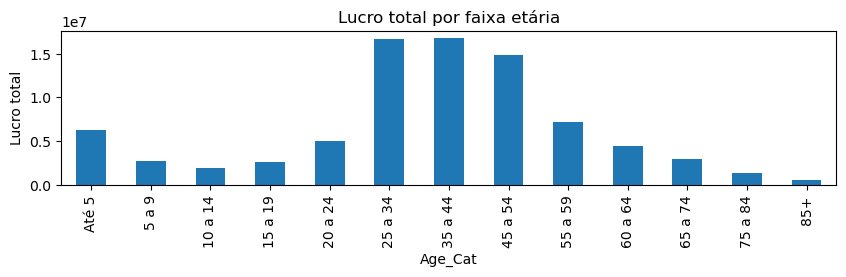

In [55]:
df_exames_custo.groupby('Age_Cat').Profit.agg(sum).plot(ylabel='Lucro total', 
title = 'Lucro total por faixa etária', kind = 'bar', figsize=(10,2))

O público que maior apresenta lucro para a rede de laboratórios é de 25 a 45 anos.

## Qual o LTV e o Faturamento por cliente?

### Faturamento por cliente médio

In [56]:
df_fat_cliente = df_exames_custo.groupby('Patient Id')['Testing Price'].agg(['sum'])

In [57]:
df_fat_cliente.head()

,sum
Patient Id,
1000007167-1,12.0
1000007439-1,52.0
1000014746-1,470.0
1000025251-1,113.0
1000029030-1,76.0


In [58]:
df_fat_cliente.describe()

,sum
count,501441.000000
mean,239.520832
std,500.752123
min,0.000000
25%,39.000000
50%,113.000000
75%,310.000000
max,149557.870000


O faturamento por cliente médio é de US$ 239,52 levando em consideração todos os 501.441 clientes.

### LTV por cliente

In [59]:
df_exames_custo['Patient Id'].nunique()

501441

In [60]:
df_exames_custo.duplicated().sum()

14552

In [61]:
df_ltv = df_exames_custo[['Patient Id', 'Date of service']].sort_values(by=['Date of service'], ascending=False)

In [62]:
df_ltv1 = df_ltv[(df_ltv['Patient Id'].duplicated(keep='first'))]

In [63]:
df_ltv2 = df_ltv[(df_ltv['Patient Id'].duplicated(keep='last'))]

In [64]:
df_ltv2.rename(columns={'Date of service' : 'Last service'}, inplace = True)

C:\Users\rapha\AppData\Local\Temp\ipykernel_11164\3272809164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ltv2.rename(columns={'Date of service' : 'Last service'}, inplace = True)


In [65]:
df_ltv_final = pd.merge(df_ltv1, df_ltv2, on = 'Patient Id', how = 'outer')

In [66]:
df_ltv_final.isnull().sum()

Patient Id         0
Date of service    0
Last service       0
dtype: int64

In [67]:
df_ltv_final['LTV'] = df_ltv_final['Date of service'] - df_ltv_final['Last service']

In [68]:
df_ltv_final.describe()

,LTV
count,31588840
mean,-4 days +00:56:50.947815748
std,98 days 06:32:28.594506141
min,-771 days +00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,711 days 00:00:00


In [69]:
df_ltv['Patient Id'].value_counts()

381241267-BIO002      415
7600923838-1          397
7656548765-1          375
7659099707-1          269
7658185288-1          208
                     ... 
7659163469-1            1
7659158761-1            1
6169298698-1            1
7659160907-1            1
10210481002-BIO003      1
Name: Patient Id, Length: 501441, dtype: int64

Há 501.441 clientes dentre os 2.353.537 exames realizados. 14.552 clientes foram mais de uma vez (2%), contudo o LTV médio do cliente que vai uma segunda vez é de apenas 4 dias.

## Selecionando os Zipcodes

### Removendo Zipcodes que já tem laboratório

In [70]:
df_demo2 = df_demo.copy()
df_demo2['Zipcode'] = df_demo2['GeographicAreaName'].str[6:]

In [71]:
df_demo2 = pd.merge(df_demo2, lab_loc[['Lab Id','Zipcode']], on = ['Zipcode'], how = 'left')

In [72]:
df_demo_final = df_demo2[(df_demo2['Lab Id'].isnull())]

In [73]:
df_demo_final.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears,Zipcode,Lab Id
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5,35004,NaN
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0,35005,NaN
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2,35006,NaN
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7,35007,NaN
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6,35010,NaN


In [74]:
df_demo_final.drop('Lab Id', axis=1, inplace = True)

### Selecionando os Zipcodes com base na faixa etária

In [75]:
df_demo_age = df_demo_final.copy()

In [76]:
df_demo_age.sort_values(by=['Population_35to44Years', 'Population_25to34Years', 'Population_45to54Years'], ascending=False,
inplace = True)

In [77]:
df_demo_age = df_demo_age.iloc[:100]

In [78]:
df_demo_age.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears,Zipcode
27857,8600000US77494,ZCTA5 77494,118291,93.7,8929,11394,12285,9231,4660,12132,23166,18058,5118,3877,5896,2616,929,35.2,77494
27823,8600000US77449,ZCTA5 77449,128294,91.5,10192,11515,12289,9307,7946,19072,21261,17449,6077,4968,5201,2472,545,31.7,77449
26907,8600000US75070,ZCTA5 75070,104415,91.8,8029,8976,8850,6703,4841,11393,19131,16093,5379,4694,6380,3257,689,37.1,75070
26882,8600000US75034,ZCTA5 75034,108525,95.3,6533,8759,10586,8014,5458,12014,18751,17630,5697,4074,6725,3398,886,36.8,75034
18752,8600000US11368,ZCTA5 11368,112088,109.4,10107,8092,7766,6583,7271,20276,18627,13408,5156,4624,5431,3303,1444,32.9,11368


### Selecionando os Zipcodes com base na população feminina

In [79]:
df_demo_final['Female Pop %'] = 100/(df_demo_final['SexRatio(males per 100 females)'] + 100)

In [80]:
df_demo_final['Female Pop'] = df_demo_final['Female Pop %'] * df_demo_final['TotalPopulation']

In [81]:
df_demo_final.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,...,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears,Zipcode,Female Pop %,Female Pop
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,...,1200,886,683,1017,534,176,35.5,35004,0.515198,6205.564142
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,...,968,612,561,798,485,156,44.0,35005,0.537346,3946.265449
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,...,430,296,260,280,201,29,47.2,35006,0.480307,1384.726225
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,...,3907,1665,1323,2096,1106,364,37.7,35007,0.512821,13503.589744
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,...,2950,1512,1472,2421,1155,424,42.6,35010,0.524934,10820.472441


In [82]:
df_demo_final.sort_values(by='Female Pop', ascending=False, inplace=True)

In [83]:
df_demo_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32503 entries, 27823 to 27514
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id                               32503 non-null  object 
 1   GeographicAreaName               32503 non-null  object 
 2   TotalPopulation                  32503 non-null  int64  
 3   SexRatio(males per 100 females)  32503 non-null  float64
 4   Population_Under5Years           32503 non-null  int64  
 5   Population_5to9Years             32503 non-null  int64  
 6   Population_10to14Years           32503 non-null  int64  
 7   Population_15to19Years           32503 non-null  int64  
 8   Population_20to24Years           32503 non-null  int64  
 9   Population_25to34Years           32503 non-null  int64  
 10  Population_35to44Years           32503 non-null  int64  
 11  Population_45to54Years           32503 non-null  int64  
 12  Population_55t

In [84]:
df_demo_fem = df_demo_final.iloc[:100]

In [85]:
df_demo_fem = df_demo_fem[['Id', 'TotalPopulation', 'SexRatio(males per 100 females)', 'Female Pop %', 'Female Pop', 'Zipcode']]

### Selecionando os Zipcodes com base na população feminina e na faixa etária

In [86]:
df_zipcodes = pd.merge(df_demo_age, df_demo_fem, on = ['Zipcode'], how = 'outer')

In [87]:
df_zipcodes.dropna(inplace=True)

In [88]:
df_zipcodes = df_zipcodes[['TotalPopulation_x', 'Population_35to44Years', 'Population_25to34Years', 'Population_45to54Years',
'Zipcode', 'Female Pop']]

In [89]:
df_zipcodes.copy().sort_values(by='TotalPopulation_x', ascending=False,inplace = True)

In [90]:
df_zipcodes = df_zipcodes.iloc[:20]
df_zipcodes.head(3)

,TotalPopulation_x,Population_35to44Years,Population_25to34Years,Population_45to54Years,Zipcode,Female Pop
0,118291.0,23166.0,12132.0,18058.0,77494,61069.179143
1,128294.0,21261.0,19072.0,17449.0,77449,66994.255875
2,104415.0,19131.0,11393.0,16093.0,75070,54439.520334



# Resultados

## Locais para instalação de 3 novos laboratórios da rede

Os novos locais a serem instalados possuem são:
- Katy, TX - Fort Bend County (ZIP Code 77494)
- Katy, TX - Harris County (ZIP Code 77449)
- Mckinney, TX - Collin County (ZIP Code 75070)

### Critério de escolha

O critério para a escolha desses locais foi com base no público que mais trouxe lucro para a rede de laboratório categorizados em idade e gênero.

### Limitações

- Não foi possível levar em consideração o local onde foram feitos os exames, havendo a possibilidade de haver Estados e/ou regiões dos EUA que a população frequenta mais a rede de laboratórios que outros.
- Também não foi possível relacionar o preço de cada exame com a renda familiar da população.

## Sugestão

Uma das premissas do mercado de medicina diagnóstica é que não é possível ou é bem difícil gerar demanda e fazer ofertas neste tipo de mercado, sendo interessante e rentável fidelizar o cliente para que ele sempre visite a rede quando surgir a necessidade. Assim, foi analisado o LTV da rede:

### LTV

Todos os 2,3 milhores de exames realizados foram feitos por 501,4 mil clientes, contudo apenas 14,5 mil clientes (2%) foram uma segunda vez, sendo o LTV médio desses clientes que vão mais de uma vez a rede de apenas 4 dias. Isso evidencia a falta de retenção dos clientes que vão a rede de laboratórios. 

A partir disso, sugiro destinar o capital de abertura de novos laboratórios para melhorar a experiência do cliente, seja antes durante e até depois do exame em si. Com isso, será possível aumentar a retenção de clientes e, consequentemente, o faturamento por cliente que é de US$ 239 poderá aumentar também.